## Check orthogonal matrices

In [11]:
import numpy as np
l = [[-0.9128709, 0.3396831, 0.0789747, 0.2122382],
[-0.3651484, -0.4529108, -0.1052996, -0.8065051],
[0.0, 0.2264554, -0.9740215, 0.0],
[-0.1825742, -0.7925939, -0.1842743, 0.5518193]]
A = np.array(l) 
At = np.transpose(A)
r = np.round(np.dot(A,At))
print(r)

[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0. -0.  1. -0.]
 [ 0. -0. -0.  1.]]


In [12]:
import math
x = np.array([0.713, 0.118, 0.438, 0.709, -0.709, -0.438, -0.118, -0.713]) 

A = np.array([[0.09754516100806412, 0.4157348061512726, 0.4903926402016152, 0.2777851165098011, -0.09754516100806418, -0.4157348061512726, -0.4903926402016152, -0.2777851165098011],
[0.1913417161825449, 0.46193976625564337, -0.19134171618254484, -0.4619397662556433, 0.19134171618254497, 0.46193976625564337, -0.19134171618254492, -0.46193976625564337],
[0.2777851165098011, 0.0975451610080643, -0.41573480615127273, 0.49039264020161527, -0.2777851165098016, -0.09754516100806404, 0.41573480615127284, -0.49039264020161505],
[0.35355339059327373, -0.35355339059327373, 0.3535533905932737, -0.35355339059327395, 0.3535533905932739, -0.35355339059327384, 0.3535533905932738, -0.3535533905932738],
[0.4157348061512726, -0.4903926402016152, 0.27778511650980114, 0.09754516100806443, -0.4157348061512725, 0.4903926402016152, -0.2777851165098007, -0.097545161008065],
[0.46193976625564337, -0.1913417161825452, -0.4619397662556432, 0.19134171618254456, 0.4619397662556438, -0.19134171618254472, -0.4619397662556431, 0.19134171618254653],
[0.4903926402016152, 0.2777851165098009, -0.09754516100806404, -0.4157348061512719, -0.4903926402016154, -0.2777851165098013, 0.09754516100806272, 0.4157348061512731],
[0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373, 0.35355339059327373]])

res = np.dot(A,x)
print(res)
s = 0
for elem in res:
    s += elem*elem
    
res3 = res[:3]
s3 = 0
for elem in res3:
    s3 += elem*elem

print(s3*100/s)

[ 1.03752651e+00 -2.06436948e-01  9.15435327e-01  2.29102597e-01
  6.11674330e-01 -8.55089838e-02  2.06376855e-01 -2.77555756e-17]
80.41873645661987


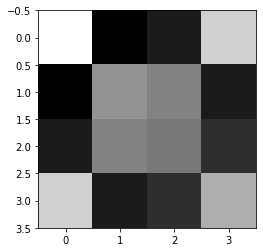

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

l = [[-0.70711, 0.40825, 0.28868, -0.5],
[0.0, -0.8165, 0.28868, -0.5],
[-0.70711, -0.40825, -0.28868, 0.5],
[0.0, 0.0, 0.86603, 0.5]]
A = np.array(l)
I1 = np.array([[1,0,0,0],
[0,0,0,0],
[0,0,0,0],
[0,0,0,0]])

r = np.dot(np.dot(np.transpose(A),I1),A)
plt.imshow(r, cmap=plt.cm.gray)

In [15]:
def Walsh_Hadamard(img_cuanti):
    metadatos = img_cuanti[0]
    n = metadatos[0]
    m = metadatos[1]
    n_b = metadatos[2]
    C = metadatos[3]
    H = createH(n_b)
    H_inv = np.linalg.inv(H) 
    m_bloques = m/n_b # columna

    imagen = []
    fila = []

    first_columna = True
    first_fila = True
    bloques_columna = 1
    for i in range(1,len(img_cuanti)):
        val =  reconstruir_mat(img_cuanti[i], n_b, C)

        #print("val", val)
        #print("val,128", 128+val)
        partezita = np.dot(np.dot(H_inv,val),H)
        #print(partezita)
        if first_columna:
            fila = partezita
            first_columna = False
        else:
            fila = np.hstack([fila,partezita])

        if bloques_columna % m_bloques == 0:
            first_columna = True
            if first_fila:
                imagen = fila
                first_fila = False
                fila = np.empty((0))
                
            else:
                imagen = np.vstack([imagen,fila])
                fila = np.empty((0))


            
        
        bloques_columna += 1
    return imagen

def reconstruir_mat(bloqueCodificado, n_b, C):

    numeritos_ini = 0
    numeritos_fin = C

    zeritos = n_b - numeritos_fin

    matrizita = []
    first = True
    
    while numeritos_fin - numeritos_ini != 0:
        fila = np.hstack((bloqueCodificado[numeritos_ini:numeritos_fin], np.zeros(zeritos)))
        if first:
            matrizita = fila
            first = False
            
        else:
            matrizita = np.vstack((matrizita, fila))

        rango = numeritos_fin - numeritos_ini - 1

        numeritos_ini = numeritos_fin
        numeritos_fin = numeritos_ini + rango

        zeritos += 1

    while  np.shape(matrizita)[0] != n_b:
        if first:
            matrizita = [np.zeros(n_b)]
            first = False
        else:
            matrizita = np.vstack((matrizita,  np.zeros(n_b)))
    
    return matrizita
def createH_inmersion(it, mat):
    if it <= 0:
        return mat
    else:
        mat_1 = np.hstack((mat,mat))
        neg = np.negative(mat)
        mat_2 = np.hstack((mat,neg))
        mat = np.vstack((mat_1,mat_2))
        return createH_inmersion(it-1,mat)


def count_cambios(fila):
    val = fila[0]
    count = 0
    for i in range(1, len(fila)):
        if val != fila[i]:
            val = fila[i]
            count += 1
    return count

def reordenar(mat):
    cambios = 0
    return sorted(mat,key=count_cambios)


def createH (it):

    mat = [1]
    mat = createH_inmersion(math.log(it,2), mat)

    mat = reordenar(mat)

    return (1/math.sqrt(it))*np.array(mat)

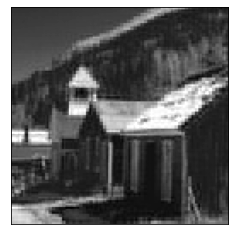

[[ -77.046875  -77.328125  -77.921875 ...  -96.28125   -98.96875
   -93.34375 ]
 [ -77.328125  -77.609375  -78.203125 ...  -99.40625  -102.09375
   -96.46875 ]
 [ -75.921875  -76.203125  -76.109375 ...  -96.34375   -91.65625
   -86.03125 ]
 ...
 [  80.75       81.4375     88.125    ...  -33.03125   -35.03125
   -33.53125 ]
 [  70.4375     71.125      72.6875   ...  -16.28125   -15.53125
   -14.03125 ]
 [  66.0625     66.75       68.3125   ...  -19.21875   -18.46875
   -16.96875 ]]


In [16]:
import pickle
with  open('-_5tktwc.csv', 'rb') as file:
    imagenCodigo=pickle.load(file)

    imagen_misteriosa = Walsh_Hadamard(imagenCodigo)

    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen_misteriosa+128, cmap=plt.cm.gray,vmin=0, vmax=255)
    plt.show()
    print(imagen_misteriosa)